Followed this tutorial to create linear models in scikit learn

https://realpython.com/linear-regression-in-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Column List
name_list = ["Station ID","Date [UTC]","Temp [F]","DP [F]","RH [%]","W Dir [Deg]","W Spd [Kts]","Alt [inHg]","1Hr-Prcp [mm]",
             "Vis [mi]","SKC1","SKC2","SKC3","Cld Hgt1 [Ft]","Cld Hgt2 [Ft]","Cld Hgt3 [Ft]","Prs Wx"]

# Data Type List
dtype_list = {"Station ID":"str","UTC":"str","Temp [F]":"float64","DP [F]":"float64","RH [%]":"float64","W Dir [Deg]":"float64",
              "W Spd [Kts]":"float64","Alt [inHg]":"float64","1Hr-Prcp [mm]":"float64","Vis [mi]":"float64","SKC1":"str",
              "SKC2":"str","SKC3":"str","Cld Hgt1 [Ft]":"float64","Cld Hgt2 [Ft]":"float64","Cld Hgt3 [Ft]":"float64",
              "Prs Wx" : "str"}

# Date Column
parse_date = ["Date [UTC]"]

# Import TxT Data
CLL_data = pd.read_csv('Data/CLL.txt', sep='\t', header=0, names = name_list, dtype = dtype_list, parse_dates = parse_date, index_col = 1).resample('1d').mean()
DFW_data = pd.read_csv('Data/DFW.txt', sep='\t', header=0, names = name_list, dtype = dtype_list, parse_dates = parse_date, index_col = 1).resample('1d').mean()
AUS_data = pd.read_csv('Data/AUS.txt', sep='\t', header=0, names = name_list, dtype = dtype_list, parse_dates = parse_date, index_col = 1).resample('1d').mean()
IAH_data = pd.read_csv('Data/IAH.txt', sep='\t', header=0, names = name_list, dtype = dtype_list, parse_dates = parse_date, index_col = 1).resample('1d').mean()

In [3]:
CLL_data.head() 

,Temp [F],DP [F],RH [%],W Dir [Deg],W Spd [Kts],Alt [inHg],1Hr-Prcp [mm],Vis [mi],Cld Hgt1 [Ft],Cld Hgt2 [Ft],Cld Hgt3 [Ft]
Date [UTC],,,,,,,,,,,
2000-01-01,61.630000,48.920000,64.916111,108.888889,6.666667,30.008333,NaN,9.944444,2025.000000,NaN,NaN
2000-01-02,71.223125,63.213125,76.888750,181.000000,9.906250,29.921875,NaN,10.000000,2553.333333,3029.166667,3650.000000
2000-01-03,69.756552,46.933793,53.424828,228.518519,9.758621,29.839655,0.0001,9.862069,3090.476190,3558.823529,4733.333333
2000-01-04,47.978462,20.473077,37.178077,316.666667,9.730769,30.305000,NaN,9.576923,2550.000000,NaN,NaN
2000-01-05,36.455000,20.367500,58.012083,83.333333,4.291667,30.352083,NaN,10.000000,NaN,NaN,NaN


## Regression Function

In [4]:
def linreg(df, x, y):
    ''' 
    Takes two columns in a shared dataframe and returns a simple plot
    of the data and linear regression line along model coefficients and r^2.
    
    ------------------------
    
    df : dataframe
        the shared dataframe for x and y
        
    x : string
        column title for the independent variable
        
    y : string
        column title for the dependent variable
    '''
    
    # sklearn doesnt like nans in the LinearRegression function
    no_nans = df[df[x].notna() & df[y].notna()]
    
    # Reshape for sklearn
    x_val = no_nans[x].values.reshape((-1,1))
    y_val = no_nans[y].values
    
    # model object holds all of our linear regression coefficeints and whatnot
    model = LinearRegression().fit(x_val,y_val)
    
    
    #####################
    # Plot Results
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    
    ax.scatter(x_val, y_val, color = (), edgecolors='k', linewidths = 0.5, s=6)
    ax.plot(x_val, model.predict(x_val), color='r')
    
    ax.set_title('{} vs Precipitation'.format(y.split(' [')[0]))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True)
    
    lin_string = 'f(x) = {slope:.2f}x + {intercept:.2f} \nr^2 = {r2:.4f}' \
    .format(slope = model.coef_[0], intercept = model.intercept_, r2 = model.score(x_val,y_val))
    
    ax.annotate(lin_string, xy=(0.05, 0.85), xycoords='axes fraction')
    
    return(plt.show(fig))

In [5]:
list(CLL_data.columns)

['Temp [F]',
 'DP [F]',
 'RH [%]',
 'W Dir [Deg]',
 'W Spd [Kts]',
 'Alt [inHg]',
 '1Hr-Prcp [mm]',
 'Vis [mi]',
 'Cld Hgt1 [Ft]',
 'Cld Hgt2 [Ft]',
 'Cld Hgt3 [Ft]']

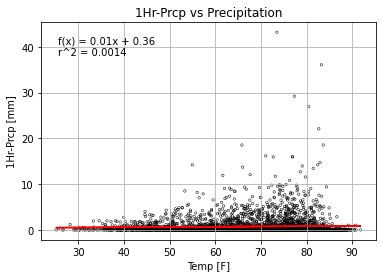

In [6]:
# Temperature vs Precipitation 
linreg(CLL_data, 'Temp [F]', '1Hr-Prcp [mm]')

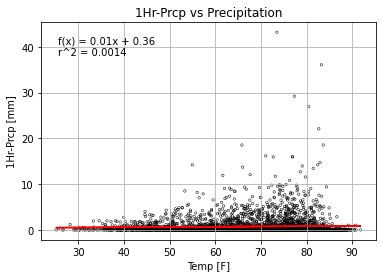

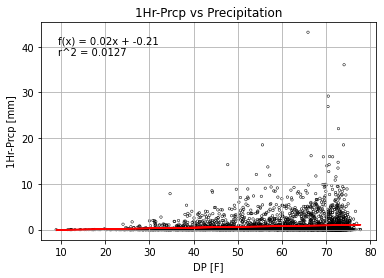

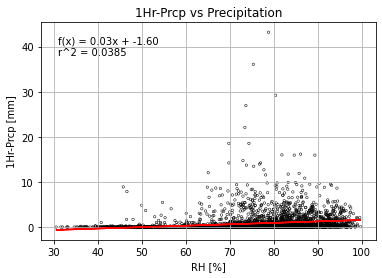

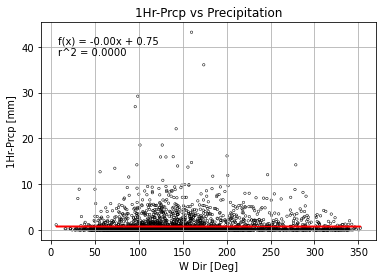

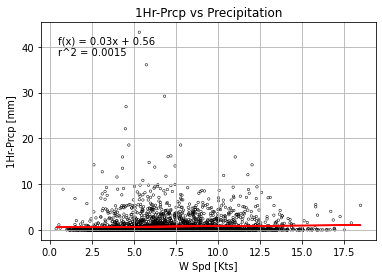

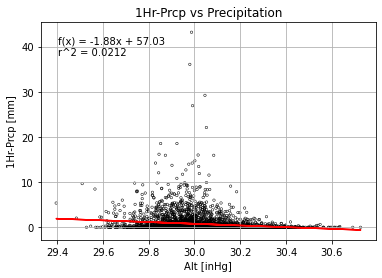

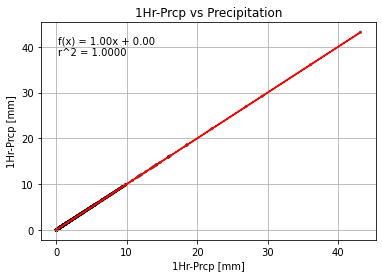

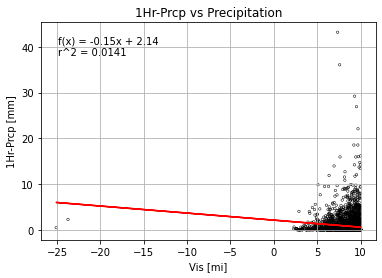

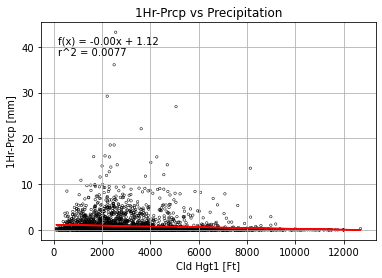

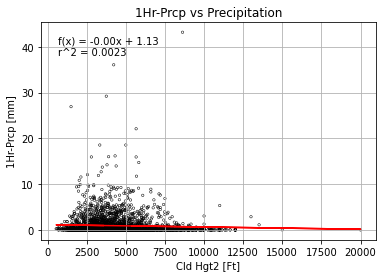

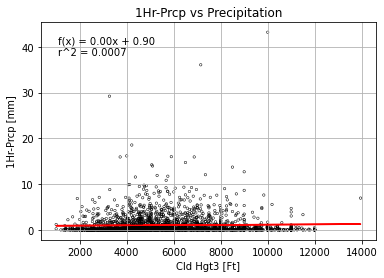

In [7]:
# All variables vs Precipiation
for i in list(CLL_data.columns):
    linreg(CLL_data, i, '1Hr-Prcp [mm]')